# S&P 500 P/E Univariate Insights

## Learning Objectives

Review information related to individual columns
    * summary stats
    * density plots
    * slicing groups and comparing group distributions

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

## Get Data

In [3]:
df = pd.read_csv('data/relative_valuation.csv')

## P/E Summary Sats

Notes:
    * Median Salary is 18.94
    * Mean Salary is 20.45
    * The distribution is highly skewed as will be shown in the KDE plot below.

## KDE Plot Salary

Notes:
    * as expected we see a right skew
    * this is reasonable since we selected only the records that have positive P/E

In [4]:
df['p/e'].describe()

count    179.000000
mean      20.456266
std       12.587180
min      -33.498142
25%       14.422668
50%       18.941177
75%       23.569246
max       81.619043
Name: p/e, dtype: float64

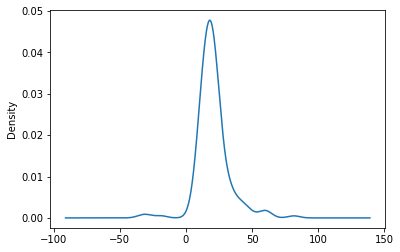

In [5]:
df['p/e'].plot(kind='kde');

##### Negative P/E Filter

    * P/E is the multiple that an average investor is willing to pay to own a stock for a given level of earnings.  
    * Negative P/E does not necessarily mean the investor is paid to own the stock but just that the earnings of the firm is negative.
    * In order to simplify the interpretation of P/E and its relation of the several variables, let's select only the records with positive P/E.

In [6]:
df = df[df['p/e']>0]

## View Univariate Stats

###### Goodwill_to_asset

Notes:
    * Goodwill is an intangible asset which arises when a firm buys up another with purchase price than identifiable asset (measure of how much firms "overpay" to buy another)
    * green is firms with high goodwill in their books, blue is firms with lower goodwill
    * firms with high goodwill are valued higher

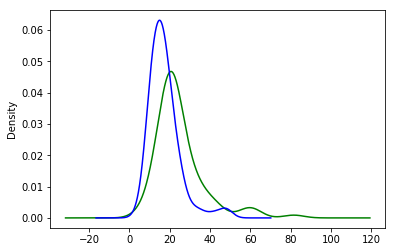

In [7]:
bix = df['Goodwill_to_asset']>10
df[bix]['p/e'].plot(kind='kde',c='g');

df[~bix]['p/e'].plot(kind='kde',c='b');

###### QuickRatio

Notes:
    * QuickRatio measures a firm's ability to pay down its current liabilities using cash + marketable securities + accounts receivable.
    * green are firms with QuickRatio > 50
    * blue are firms with QuickRatio <= 50  
    * Firms with higher quick ratio is viewed favorably by the market as evident in the higher P/E multiple.

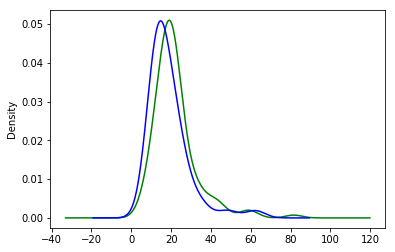

In [8]:
bix = df['QuickRatio']>50
df[bix]['p/e'].plot(kind='kde',c='g');

df[~bix]['p/e'].plot(kind='kde',c='b');

###### Operating Cash Flow Margin

Notes:
    * Operating cash flow margin is the ratio of operating cash flow to sales which measures the firms ability to generate cash from operations.
    * Typically, firms with higher operating cash flow margin demand higher valuation.
    * green are firms with cash flow margin > 5%
    * blue are firms with cash flow margin <= 5%

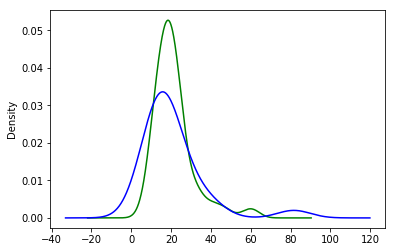

In [9]:
bix = df['operating_cash_flow_margin']>5
df[bix]['p/e'].plot(kind='kde',c='g');

df[~bix]['p/e'].plot(kind='kde',c='b');